In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda
import datetime
import salem
from salem import get_demo_file, DataLevels, GoogleVisibleMap, Map
import shapely.geometry as shpg
import glob
import pickle as pkl
import os


pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:

tag = 'satellite'
g = GoogleVisibleMap(x=[-80, 140], y=[-40, 30],
                     scale=2,  # scale is for more details
                     maptype=tag)  # try out also: 'terrain'

In [4]:
g.set_subset(corners=[(-82,-45),(142,48)])
ggl_img = g.get_vardata()

/home/ck/miniconda3/lib/python3.7/site-packages/descartes/patch.py:87: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return PathPatch(PolygonPath(polygon), **kwargs)


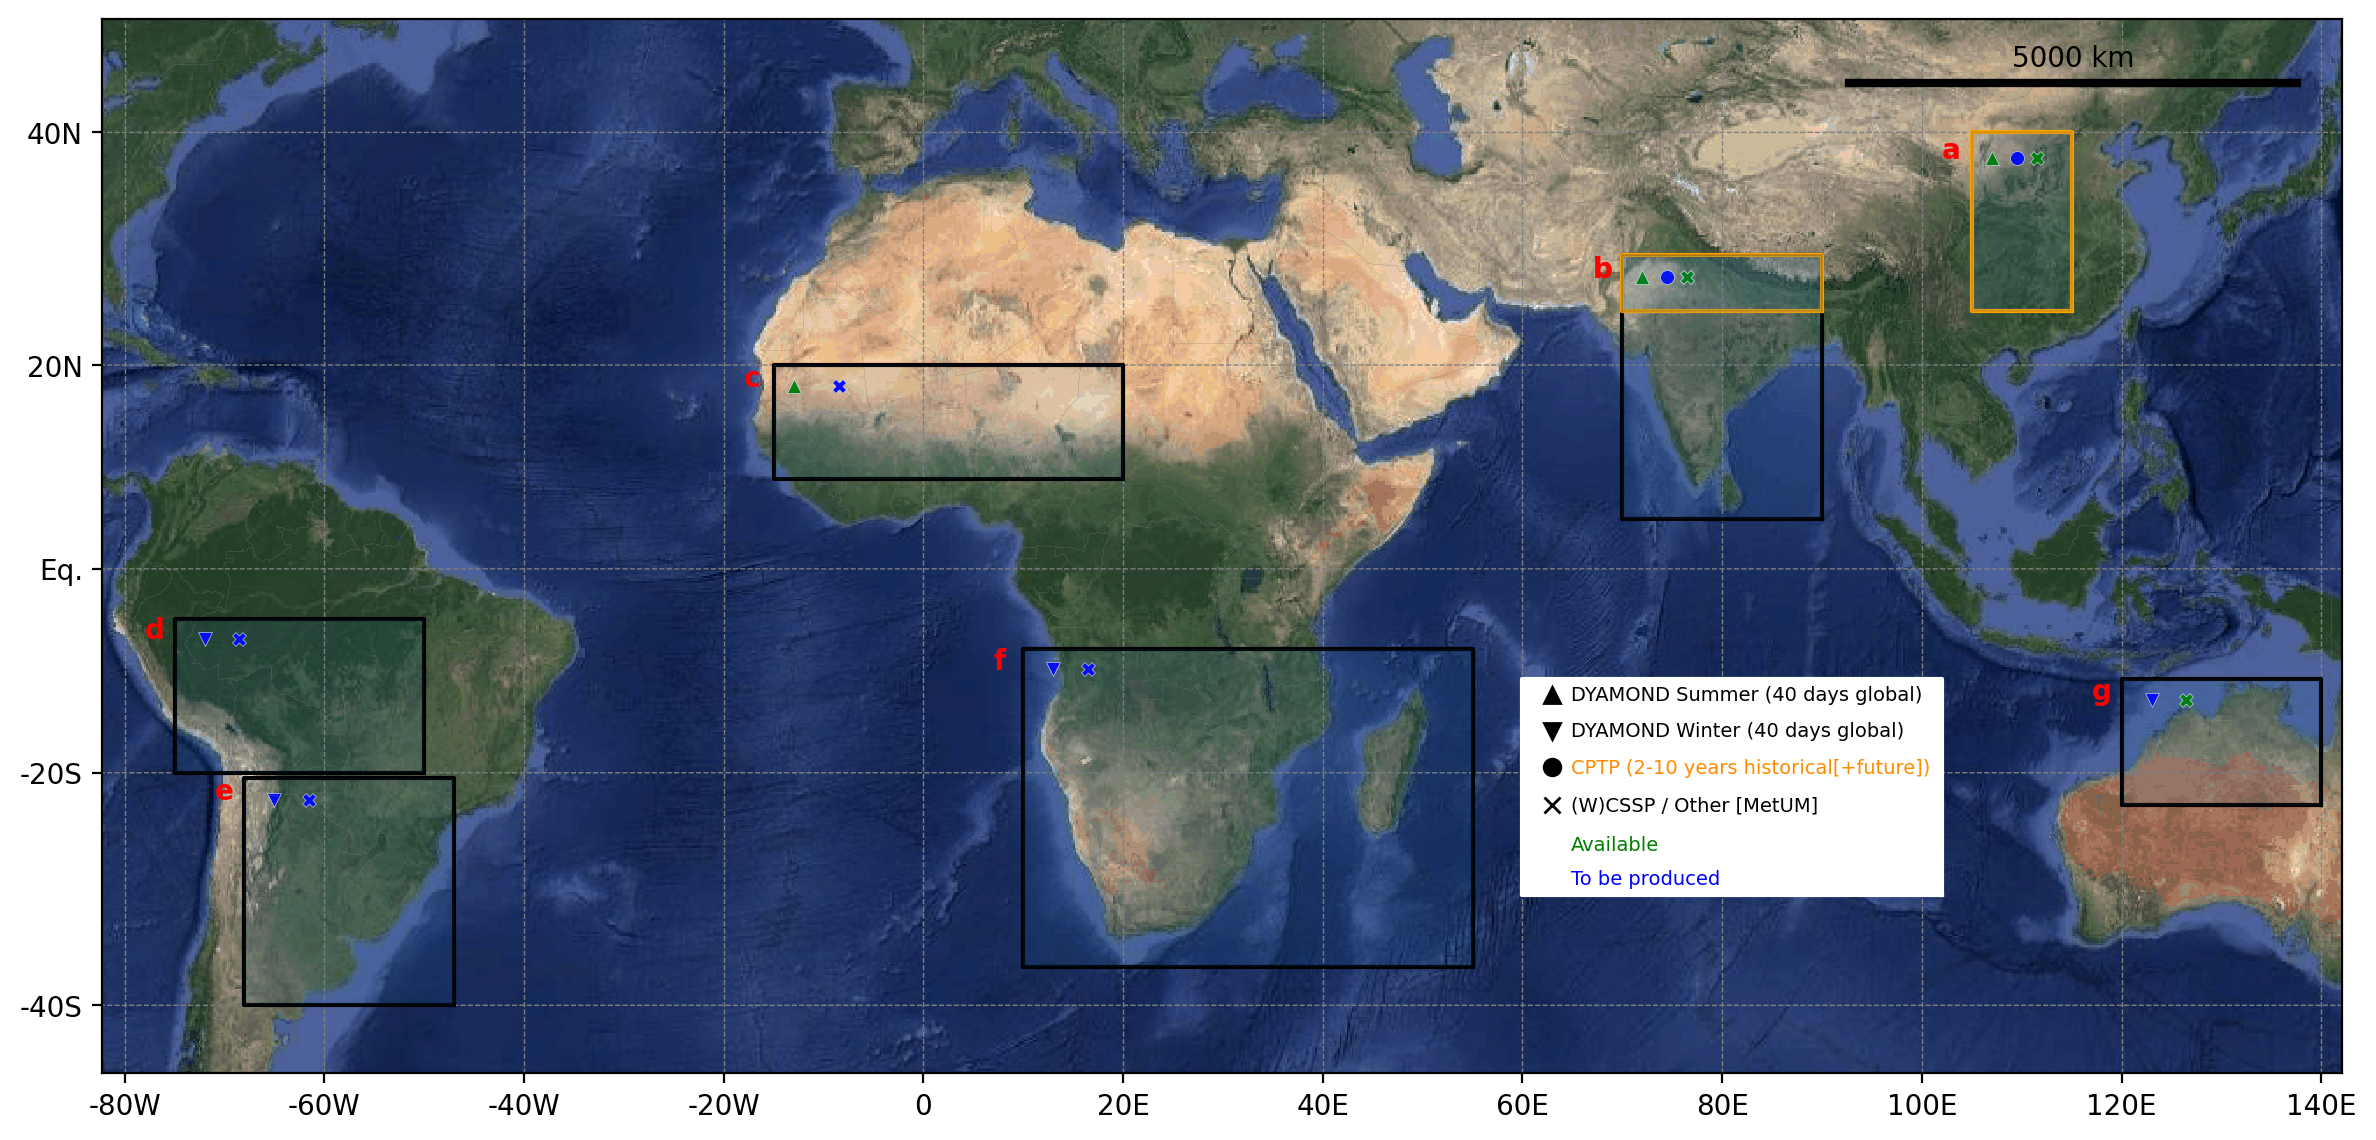

In [9]:
regions = {
    'india' : ([70,90, 5,30], 'k', 'solid', 0.8, ("^", 'g'), ("", 'b') , ("o", 'b'), ("X", 'g'), 'b'),
    'india_cptp' : ([70,90, 25,30], 'k', 'solid', 0.8, ("^", 'g'), ("", 'b') , ("o", 'b'), ("X", 'g'), 'b'),
    #'cptp' : ([70,115,25,40], 'blue', 'dashed', 2, ('o', 'k')),
    'china' : ([105,115,25,40], 'k', 'solid', 0.8, ("^", 'g') , ("", 'b') , ("o", 'b'), ("X", 'g'), 'a'),
    'australia' : ([120,140,-23, -11], 'k', 'solid', 0.8, ('', 'k'), ("v", 'b') , ("", 'b'), ("X", 'g'), 'g'),
    'sa' : ([10,55, -37,-8], 'k', 'solid', 0.8, ('', 'k'), ("v", 'b'),  ("", 'b'), ("X", 'b'), 'f'),  #[20,35, -35,-15]
    'sub_ssa' : ([-68,-47, -40, -20.5], 'k', 'solid', 0.8, ('', 'k'), ("v", 'b') ,  ("", 'b'), ("X", 'b'), 'e'),
    'trop_ssa' : ([-75, -50, -20, -5], 'k', 'solid', 0.8, ('', 'g'), ("v", 'b'), ("", 'b') , ("X", 'b'), 'd'),
    'sahel' : ([-15, 20, 9, 20], 'k', 'solid', 0.8, ("^", 'g'), ("", 'b'), ("", 'b') , ("X", 'b'), 'c')
    }

region_data = {'india' : 'asia', 
               'india_cptp' : 'asia', 
               'china' : 'asia', 
               'australia' : 'asia', 
               'sa' : 'spac', 
               'sub_ssa' : 'spac', 
               'trop_ssa' : 'spac',
               'sahel' : 'spac'}


f = plt.figure(figsize=(12,6), dpi=200)
ax1 = f.add_subplot(111)
# make a map of the same size as the image (no country borders)



sm = Map(g.grid, factor=1)
# Change the country borders
sm.set_shapefile()
sm.set_shapefile(countries=True, color='grey', linewidths=0.05)

# Change the lon-lat countour setting
sm.set_lonlat_contours()
sm.set_lonlat_contours( interval=20, linewidths=0.5,
                         linestyles='dashed', colors='grey')

sm.set_rgb(ggl_img)  # add the background rgb image
sm.set_scale_bar(location=(0.88, 0.94))  # add scale
if tag == 'terrain':
    ec = 'k'
else:
    ec = 'w'
for reg in regions.keys():
        #sm.set_geometry()
        coord = (regions[reg])[0]
        #ipdb.set_trace()
        geom = shpg.box(coord[0], coord[2], coord[1], coord[3])
        if (reg == 'india_cptp') | (reg=='china'):
            edc = 'orange'
        else:
            edc = (regions[reg])[1]
        sm.set_geometry(geom, zorder=99, facecolor=None,edgecolor=edc, linewidth=(regions[reg])[3], linestyle=(regions[reg])[2], alpha=0.1) 
        
        x, y = sm.grid.transform(coord[0]-3, coord[3]-2)
        plt.text(x,y,(regions[reg])[8], fontweight='bold', color='red')

        points = (regions[reg])[4]
        x, y = sm.grid.transform(coord[0]+2, coord[3]-2)
        plt.scatter(x, y, color=points[1],marker=points[0], s=25, edgecolor=ec, linewidth=0.2)
        
        points = (regions[reg])[5]
        x, y = sm.grid.transform(coord[0]+3, coord[3]-2)
        plt.scatter(x, y, color=points[1],marker=points[0], s=25, edgecolor=ec, linewidth=0.2)
        
        points = (regions[reg])[6]
        x, y = sm.grid.transform(coord[0]+4.5, coord[3]-2)
        plt.scatter(x, y, color=points[1],marker=points[0], s=25, edgecolor=ec, linewidth=0.2)
        
        points = (regions[reg])[7]
        x, y = sm.grid.transform(coord[0]+6.5, coord[3]-2)
        plt.scatter(x, y, color=points[1],marker=points[0], s=25, edgecolor=ec, linewidth=0.2)

   
boxed = shpg.box(60, -31, 102, -11)
sm.set_geometry(boxed, facecolor='white',edgecolor='white', color='white', fill=True, zorder=98)
        
lon,lat = 63, -12.5
x, y = sm.grid.transform(lon, lat)
plt.plot(x,y,color='k', marker='^', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, 'DYAMOND Summer (40 days global)', fontsize=7, zorder=99)

lon,lat = 63, -16
x, y = sm.grid.transform(lon, lat)
plt.plot(x,y,color='k', marker='v', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, 'DYAMOND Winter (40 days global)', fontsize=7, zorder=99)

lon,lat = 63, -19.5
x, y = sm.grid.transform(lon, lat)
plt.plot(x,y,color='k', marker='o', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, 'CPTP (2-10 years historical[+future])', fontsize=7, zorder=99, color='darkorange')

lon,lat = 63, -23
x, y = sm.grid.transform(lon, lat)
plt.plot(x,y,color='k', marker='x', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, '(W)CSSP / Other [MetUM]', fontsize=7, zorder=99)

lon,lat = 63, -26.5
x, y = sm.grid.transform(lon, lat)
#plt.plot(x,y,color='k', marker='x', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, 'Available', fontsize=7, zorder=99, color='g')

lon,lat = 63, -29.5
x, y = sm.grid.transform(lon, lat)
#plt.plot(x,y,color='k', marker='x', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, 'To be produced', fontsize=7, zorder=99, color='b')


sm.visualize()  # plot it
plt.tight_layout()
#f.savefig('/home/ck/OneDrive/data/CEH/proposals/MCS_global_proposal/regions_plot_'+tag+'.jpg')

In [4]:
region='WAf'
files = '/media/ck/Elements/global/MCS_Feng/tracks/custom/'+region+'/*.nc'

In [5]:
fs = glob.glob(files)

In [6]:
fs

['/media/ck/Elements/global/MCS_Feng/tracks/custom/WAf/robust_mcs_tracks_extc_20000101_20001231.nc',
 '/media/ck/Elements/global/MCS_Feng/tracks/custom/WAf/robust_mcs_tracks_extc_20010101_20011231.nc',
 '/media/ck/Elements/global/MCS_Feng/tracks/custom/WAf/robust_mcs_tracks_extc_20020101_20021231.nc',
 '/media/ck/Elements/global/MCS_Feng/tracks/custom/WAf/robust_mcs_tracks_extc_20030101_20031231.nc',
 '/media/ck/Elements/global/MCS_Feng/tracks/custom/WAf/robust_mcs_tracks_extc_20040101_20041231.nc',
 '/media/ck/Elements/global/MCS_Feng/tracks/custom/WAf/robust_mcs_tracks_extc_20050101_20051231.nc',
 '/media/ck/Elements/global/MCS_Feng/tracks/custom/WAf/robust_mcs_tracks_extc_20060101_20061231.nc',
 '/media/ck/Elements/global/MCS_Feng/tracks/custom/WAf/robust_mcs_tracks_extc_20070101_20071231.nc',
 '/media/ck/Elements/global/MCS_Feng/tracks/custom/WAf/robust_mcs_tracks_extc_20080101_20081231.nc',
 '/media/ck/Elements/global/MCS_Feng/tracks/custom/WAf/robust_mcs_tracks_extc_20090101_2009

In [7]:
ds = xr.open_dataset(fs[0])

In [13]:
ds

<xarray.Dataset>
Dimensions:                       (nmaxmerge: 100, nmaxpf: 3, nmaxpix: 10000, times: 200, tracks: 800)
Coordinates:
  * tracks                        (tracks) int32 1 3 8 20 ... 7885 8080 8116
  * times                         (times) float32 0.0 1.0 2.0 ... 198.0 199.0
Dimensions without coordinates: nmaxmerge, nmaxpf, nmaxpix
Data variables:
    length                        (tracks) float32 11.0 11.0 19.0 ... 40.0 17.0
    mcs_length                    (tracks) float32 nan nan nan ... nan nan nan
    mcs_type                      (tracks) int16 1 1 1 1 2 2 1 ... 1 1 2 1 2 1 1
    starttrackresult              (tracks) float32 2.0 -1.0 1.0 ... 2.0 10.0
    endtrackresult                (tracks) float32 0.0 0.0 0.0 ... 0.0 -1.0 -1.0
    base_time                     (tracks, times) datetime64[ns] ...
    julian_day                    (tracks, times) float64 ...
    datetimestring                (tracks, times) |S1 ...
    mcs_status                    (tracks, times) float32 ...
    meanlat                       (tracks, times) float32 ...
    meanlon                       (tracks, times) float32 ...
    core_area                     (tracks, times) float32 ...
    ccs_area                      (tracks, times) float32 ...
    mintb                         (tracks, times) float32 ...
    meantb                        (tracks, times) float32 ...
    ccs_meantb                    (tracks, times) float32 ...
    core_meantb                   (tracks, times) float32 ...
    speed                         (tracks, times) float32 ...
    direction                     (tracks, times) float32 ...
    uspeed                        (tracks, times) float32 ...
    vspeed                        (tracks, times) float32 ...
    trackresult                   (tracks, times) float32 ...
    cloudnumber                   (tracks, times) float64 ...
    majoraxislength               (tracks, times) float32 ...
    eccentricity                  (tracks, times) float32 ...
    mergecloudnumber              (tracks, times, nmaxmerge) float64 ...
    splitcloudnumber              (tracks, times, nmaxmerge) float64 ...
    pf_length                     (tracks) float32 11.0 8.0 19.0 ... 40.0 17.0
    pf_mcsstatus                  (tracks, times) float32 ...
    pf_heavyrainratio             (tracks, times) float32 ...
    total_rain                    (tracks, times) float32 ...
    total_heavyrain               (tracks, times) float32 ...
    rainrate_heavyrain            (tracks, times) float32 ...
    npf                           (tracks, times) float32 ...
    pf_landfrac                   (tracks, times) float64 ...
    pf_area                       (tracks, times, nmaxpf) float32 ...
    pf_lon                        (tracks, times, nmaxpf) float32 ...
    pf_lat                        (tracks, times, nmaxpf) float32 ...
    pf_rainrate                   (tracks, times, nmaxpf) float32 ...
    pf_maxrainrate                (tracks, times, nmaxpf) float32 ...
    pf_accumrain                  (tracks, times, nmaxpf) float32 ...
    pf_accumrainheavy             (tracks, times, nmaxpf) float32 ...
    pf_skewness                   (tracks, times, nmaxpf) float32 ...
    pf_majoraxislength            (tracks, times, nmaxpf) float32 ...
    pf_aspectratio                (tracks, times, nmaxpf) float32 ...
    pf_rr8mm_npix                 (tracks, times, nmaxpf) float64 ...
    pf_rr10mm_npix                (tracks, times, nmaxpf) float64 ...
    pf_nuniqpix                   (tracks) int32 -2147483647 ... -2147483647
    location_idx                  (tracks, nmaxpix) float64 ...
    pixel_duration                (tracks, nmaxpix) float32 ...
    pixel_pcp                     (tracks, nmaxpix) float32 ...
    movement_r                    (tracks, times) float32 ...
    movement_r_meters_per_second  (tracks, times) float32 ...
    movement_theta                (tracks, times) float32 ...
    movement_storm_x              (tracks,

In [11]:
#base_time = current time
#tracks = track index to separate tracks
#times = hours of track, starting at t=0 - we don't want MCS with times = 0

In [29]:
afterinit = ds.isel(tracks=5)

In [32]:
int(afterinit.tracks)

35

In [25]:
afterinit.isel(times=1)

<xarray.Dataset>
Dimensions:                       (nmaxmerge: 100, nmaxpf: 3, nmaxpix: 10000)
Coordinates:
    tracks                        int32 1
    times                         float32 1.0
Dimensions without coordinates: nmaxmerge, nmaxpf, nmaxpix
Data variables:
    length                        float32 11.0
    mcs_length                    float32 nan
    mcs_type                      int16 1
    starttrackresult              float32 2.0
    endtrackresult                float32 0.0
    base_time                     datetime64[ns] 2000-06-01T01:30:00
    julian_day                    float64 2.452e+06
    datetimestring                |S1 b''
    mcs_status                    float32 1.0
    meanlat                       float32 7.810731
    meanlon                       float32 -12.158462
    core_area                     float32 193300.0
    ccs_area                      float32 292000.0
    mintb                         float32 191.0
    meantb                        float32 217.33714
    ccs_meantb                    float32 nan
    core_meantb                   float32 209.275
    speed                         float32 7.8210783
    direction                     float32 245.57187
    uspeed                        float32 -7.12094
    vspeed                        float32 -3.2344203
    trackresult                   float32 -1.0
    cloudnumber                   float64 9.0
    majoraxislength               float32 760.4224
    eccentricity                  float32 0.71403754
    mergecloudnumber              (nmaxmerge) float64 145.0 nan nan ... nan nan
    splitcloudnumber              (nmaxmerge) float64 nan nan nan ... nan nan
    pf_length                     float32 11.0
    pf_mcsstatus                  float32 1.0
    pf_heavyrainratio             float32 nan
    total_rain                    float32 6544.839
    total_heavyrain               float32 969.46436
    rainrate_heavyrain            float32 11.680293
    npf                           float32 4.0
    pf_landfrac                   float64 0.2414
    pf_area                       (nmaxpf) float32 97600.0 2500.0 1200.0
    pf_lon                        (nmaxpf) float32 -12.700207 ... -10.583333
    pf_lat                        (nmaxpf) float32 7.1048207 4.114 4.2833333
    pf_rainrate                   (nmaxpf) float32 5.5674987 4.258756 4.0683494
    pf_maxrainrate                (nmaxpf) float32 18.4421 10.298949 7.9892592
    pf_accumrain                  (nmaxpf) float32 5433.879 106.4689 48.82019
    pf_accumrainheavy             (nmaxpf) float32 959.1653 10.298949 nan
    pf_skewness                   (nmaxpf) float32 0.99053293 ... 0.76435024
    pf_majoraxislength            (nmaxpf) float32 608.8607 103.97831 50.332226
    pf_aspectratio                (nmaxpf) float32 2.3866591 3.0144463 1.732051
    pf_rr8mm_npix                 (nmaxpf) float64 207.0 2.0 nan
    pf_rr10mm_npix                (nmaxpf) float64 82.0 1.0 nan
    pf_nuniqpix                   int32 -2147483647
    location_idx                  (nmaxpix) float64 nan nan nan ... nan nan nan
    pixel_duration                (nmaxpix) float32 nan nan nan ... nan nan nan
    pixel_pcp                     (nmaxpix) float32 nan nan nan ... nan nan nan
    movement_r                    float32 94.33981
    movement_r_meters_per_second  float32 26.205503
    movement_theta                float32 -57.994617
    movement_storm_x              float32 50.0
    movement_storm_y              float32 -80.0
    movement_time_lag             float32 9.96921e+36
Attributes:
    title:                           Robust MCS statistics defined by precipi...
    source1:                         gpmirimerg
    description:                     gpm
    startdate:                       20000101
    enddate:                         20001231
    _FillValue:                      -999
    time_resolution_hour:            1.0
    MCS_area_km2:                    40000.0
    MCS_duration_hour:              

In [ ]:
len(afterinit.sel(times=0)['pf_lon'])

In [3]:
pfdic = {}

for dv in afterinit.sel(times=0).data_vars:
    print(dv , afterinit.sel(times=0)[dv].shape)
    pfdic[dv] = []

NameError: name 'afterinit' is not defined

In [4]:
# regions = {
#     'india' : ([70,90, 5,30], 'k', 'solid', 0.8, ("^", 'g'), ("", 'b') , ("o", 'b'), ("X", 'g'), 'b'),
#     'india_cptp' : ([70,90, 25,30], 'k', 'solid', 0.8, ("^", 'g'), ("", 'b') , ("o", 'b'), ("X", 'g'), 'b'),
#     #'cptp' : ([70,115,25,40], 'blue', 'dashed', 2, ('o', 'k')),
#     'china' : ([105,115,25,40], 'k', 'solid', 0.8, ("^", 'g') , ("", 'b') , ("o", 'b'), ("X", 'g'), 'a'),
#     'australia' : ([120,140,-23, -11], 'k', 'solid', 0.8, ('', 'k'), ("v", 'b') , ("", 'b'), ("X", 'g'), 'g'),
#     'sa' : ([20,35, -35,-15], 'k', 'solid', 0.8, ('', 'k'), ("v", 'b'),  ("", 'b'), ("X", 'b'), 'f'),
#     'sub_ssa' : ([-68,-47, -40, -20.5], 'k', 'solid', 0.8, ('', 'k'), ("v", 'b') ,  ("", 'b'), ("X", 'b'), 'e'),
#     'trop_ssa' : ([-75, -50, -20, -5], 'k', 'solid', 0.8, ('', 'g'), ("v", 'b'), ("", 'b') , ("X", 'b'), 'd'),
#     'sahel' : ([-15, 20, 9, 20], 'k', 'solid', 0.8, ("^", 'g'), ("", 'b'), ("", 'b') , ("X", 'b'), 'c')
#     }


mregions = {'WAf' : [[-18,25,4,25], 'spac', 0], # last is hourly offset to UCT # 12
 'SAf' : [[20,35, -35,-15], 'spac', 2], # 10
 'india' : [[70,90, 5,30], 'asia', 5], # 7
 'china' : [[105,115,25,40], 'asia', 8 ], # 4
 'australia' : [[120,140,-23, -11], 'asia', 9], # 3
 'sub_SA' : [[-68,-47, -40, -20.5], 'spac', -4] , # 16
 'trop_SA' : [[-75, -50, -20, -5], 'spac', -5], # 17
 'GPlains' : [[-100,-90,32,47], 'nam', -6] # # 18

}

In [7]:
def extract_box(region):
    dtag = region #mregions[region][1]
  #  box = mregions[region][0]
    files = glob.glob('/media/ck/Elements/global/MCS_Feng/tracks/custom/'+dtag+'/*_201*.nc')
    
    out = '/home/ck/DIR/cornkle/data/GLOBAL_MCS/save_files/'
    
    dumpkeys = ['datetimestring', 'movement_r', 'movement_theta', 'movement_r_meters_per_second', 
                              'movement_time_lag', 'movement_storm_x', 'movement_storm_y', 'pf_nuniqpix', 'location_idx', 'pixel_duration',
                             'pixel_pcp', 'pf_skewness']      
    
    for ff in files:

        ds = xr.open_dataset(ff)
        #ds = ds.sel(tracks=slice(0,5))
        
        fname = os.path.basename(ff)
        
        outname = fname[0:-3].replace('robust', region+'_winit_distance_')
        
        outfilename = out+outname+'.p'
        
        if os.path.isfile(outfilename):
            print('File exists, continue')
            continue
        
        #ipdb.set_trace()
        pfdic = {}

        for dv in ds.isel(times=0, tracks=0).data_vars:
            if dv in dumpkeys:
                continue
            pfdic[dv] = []
            
        pfdic['year'] = []
        pfdic['month'] = []
        pfdic['hour'] = []
        pfdic['minute'] = []
        pfdic['tracktime'] = []
        pfdic['trackid'] = []
        pfdic['londiff_loc-init'] = []
        pfdic['latdiff_loc-init'] = []
        pfdic['init_lon'] = []
        pfdic['init_lat'] = []

        for ids, ai in enumerate(ds.tracks):
            track = ds.sel(tracks=ai)
            
            init_lon = track.sel(times=0)['meanlon']
            init_lat = track.sel(times=0)['meanlat']
            
            for tids in track.times:
                tt = track.sel(times=tids)

                #ipdb.set_trace()

                if np.isnan(tt['meanlat']):
                    continue
                print('Doing', tt['base_time'].values)
#                 if (tt['meanlat']<box[2]) | (tt['meanlat']>box[3]) | (tt['meanlon']<box[0]) | (tt['meanlon']>box[1]):
#                     continue

                print('Location ', tt['meanlat'].values, tt['meanlon'].values)

                print('Writing ', tt['base_time'].values)
                
                pfdic['tracktime'].append(tids)
                pfdic['trackid'].append(int(track.tracks))
                pfdic['londiff_loc-init'].append(tt['meanlon'].values-init_lon.values)
                pfdic['latdiff_loc-init'].append(tt['meanlat'].values-init_lat.values)
                pfdic['init_lon'].append(init_lon.values)
                pfdic['init_lat'].append(init_lat.values)

                for dv in tt.data_vars:
                    if dv in dumpkeys:
                        continue
                    
                    if dv == 'base_time':

                        dtime = pd.Timestamp(tt[dv].values)
                        
                        pfdic['year'].append(dtime.year)
                        pfdic['month'].append(dtime.month)
                        pfdic['hour'].append(dtime.hour)
                        pfdic['minute'].append(dtime.minute)

                        #ipdb.set_trace()
                    
                    pfdic[dv].append(tt[dv].values)

   
        pkl.dump(pfdic, open('/home/ck/DIR/cornkle/data/GLOBAL_MCS/save_files/'+outname+'.p', "wb"))
        del ds

In [8]:
for rr in ['WAf']: #'india', 'sub_SA', 'australia', 'china', 'SAf', 'GPlains']:
    extract_box(rr)

Doing 2010-01-09T04:30:00.000000000
Location  4.7284327 -12.179412
Writing  2010-01-09T04:30:00.000000000
Doing 2010-01-09T05:30:00.000000000
Location  4.77245 -12.10102
Writing  2010-01-09T05:30:00.000000000
Doing 2010-01-09T06:30:00.000000000
Location  4.6787934 -12.175653
Writing  2010-01-09T06:30:00.000000000
Doing 2010-01-09T07:30:00.000000000
Location  4.5759406 -12.333961
Writing  2010-01-09T07:30:00.000000000
Doing 2010-01-09T08:30:00.000000000
Location  4.466614 -12.377077
Writing  2010-01-09T08:30:00.000000000
Doing 2010-01-09T09:30:00.000000000
Location  4.3679237 -12.235197
Writing  2010-01-09T09:30:00.000000000
Doing 2010-01-09T10:30:00.000000000
Location  4.3120375 -12.275828
Writing  2010-01-09T10:30:00.000000000
Doing 2010-01-09T11:30:00.000000000
Location  4.2722015 -12.323906
Writing  2010-01-09T11:30:00.000000000
Doing 2010-01-09T12:30:00.000000000
Location  4.080342 -12.646571
Writing  2010-01-09T12:30:00.000000000
Doing 2010-01-09T13:30:00.000000000
Location  4.115

Doing 2010-01-13T03:30:00.000000000
Location  4.05 8.9375
Writing  2010-01-13T03:30:00.000000000
Doing 2010-01-13T04:30:00.000000000
Location  4.2512355 8.612963
Writing  2010-01-13T04:30:00.000000000
Doing 2010-01-13T05:30:00.000000000
Location  4.1057973 8.47971
Writing  2010-01-13T05:30:00.000000000
Doing 2010-01-13T06:30:00.000000000
Location  3.8261268 8.249099
Writing  2010-01-13T06:30:00.000000000
Doing 2010-01-13T07:30:00.000000000
Location  3.8958652 8.12218
Writing  2010-01-13T07:30:00.000000000
Doing 2010-01-13T08:30:00.000000000
Location  3.912693 7.998846
Writing  2010-01-13T08:30:00.000000000
Doing 2010-01-13T09:30:00.000000000
Location  4.023486 7.967045
Writing  2010-01-13T09:30:00.000000000
Doing 2010-01-13T10:30:00.000000000
Location  3.8889146 7.768099
Writing  2010-01-13T10:30:00.000000000
Doing 2010-01-13T11:30:00.000000000
Location  3.7972455 6.8263764
Writing  2010-01-13T11:30:00.000000000
Doing 2010-01-13T12:30:00.000000000
Location  3.7603076 6.424619
Writing  

Doing 2010-01-16T18:30:00.000000000
Location  1.7562834 12.290185
Writing  2010-01-16T18:30:00.000000000
Doing 2010-01-16T19:30:00.000000000
Location  1.6398629 11.791527
Writing  2010-01-16T19:30:00.000000000
Doing 2010-01-16T20:30:00.000000000
Location  1.4099363 11.622093
Writing  2010-01-16T20:30:00.000000000
Doing 2010-01-16T21:30:00.000000000
Location  1.3128616 11.542584
Writing  2010-01-16T21:30:00.000000000
Doing 2010-01-16T22:30:00.000000000
Location  1.1424699 11.37042
Writing  2010-01-16T22:30:00.000000000
Doing 2010-01-16T23:30:00.000000000
Location  0.81824327 11.183648
Writing  2010-01-16T23:30:00.000000000
Doing 2010-01-17T00:30:00.000000000
Location  0.71279484 11.0587
Writing  2010-01-17T00:30:00.000000000
Doing 2010-01-17T01:30:00.000000000
Location  0.69638383 10.916101
Writing  2010-01-17T01:30:00.000000000
Doing 2010-01-17T02:30:00.000000000
Location  0.7961582 10.740316
Writing  2010-01-17T02:30:00.000000000
Doing 2010-01-17T03:30:00.000000000
Location  0.4820095

Doing 2010-01-19T14:30:00.000000000
Location  0.9055744 0.61655384
Writing  2010-01-19T14:30:00.000000000
Doing 2010-01-19T15:30:00.000000000
Location  0.95193624 1.1001209
Writing  2010-01-19T15:30:00.000000000
Doing 2010-01-19T16:30:00.000000000
Location  0.7826241 1.5663117
Writing  2010-01-19T16:30:00.000000000
Doing 2010-01-19T17:30:00.000000000
Location  0.22647057 1.4882351
Writing  2010-01-19T17:30:00.000000000
Doing 2010-01-26T02:30:00.000000000
Location  5.0611115 -15.016667
Writing  2010-01-26T02:30:00.000000000
Doing 2010-01-26T03:30:00.000000000
Location  4.957629 -15.644068
Writing  2010-01-26T03:30:00.000000000
Doing 2010-01-26T04:30:00.000000000
Location  4.8066583 -15.369455
Writing  2010-01-26T04:30:00.000000000
Doing 2010-01-26T05:30:00.000000000
Location  4.6580777 -15.136221
Writing  2010-01-26T05:30:00.000000000
Doing 2010-01-26T06:30:00.000000000
Location  4.6159225 -14.918346
Writing  2010-01-26T06:30:00.000000000
Doing 2010-01-26T07:30:00.000000000
Location  4.

Doing 2010-01-28T08:30:00.000000000
Location  8.091733 -5.677559
Writing  2010-01-28T08:30:00.000000000
Doing 2010-01-28T09:30:00.000000000
Location  7.8045444 -6.040909
Writing  2010-01-28T09:30:00.000000000
Doing 2010-01-29T16:30:00.000000000
Location  5.268868 9.438679
Writing  2010-01-29T16:30:00.000000000
Doing 2010-01-29T17:30:00.000000000
Location  5.3014936 9.298508
Writing  2010-01-29T17:30:00.000000000
Doing 2010-01-29T18:30:00.000000000
Location  5.9673896 9.528503
Writing  2010-01-29T18:30:00.000000000
Doing 2010-01-29T19:30:00.000000000
Location  6.1156497 9.58416
Writing  2010-01-29T19:30:00.000000000
Doing 2010-01-29T20:30:00.000000000
Location  6.2329655 9.534486
Writing  2010-01-29T20:30:00.000000000
Doing 2010-01-29T21:30:00.000000000
Location  6.3102794 9.439483
Writing  2010-01-29T21:30:00.000000000
Doing 2010-01-29T22:30:00.000000000
Location  6.4577866 9.446386
Writing  2010-01-29T22:30:00.000000000
Doing 2010-01-29T23:30:00.000000000
Location  6.6245637 9.467401


Doing 2010-02-04T12:30:00.000000000
Location  4.1297398 -16.345615
Writing  2010-02-04T12:30:00.000000000
Doing 2010-02-04T13:30:00.000000000
Location  4.160694 -15.827182
Writing  2010-02-04T13:30:00.000000000
Doing 2010-02-04T14:30:00.000000000
Location  3.6999402 -17.382095
Writing  2010-02-04T14:30:00.000000000
Doing 2010-02-04T15:30:00.000000000
Location  2.9926827 -20.550817
Writing  2010-02-04T15:30:00.000000000
Doing 2010-02-04T16:30:00.000000000
Location  3.1452491 -19.81733
Writing  2010-02-04T16:30:00.000000000
Doing 2010-02-04T17:30:00.000000000
Location  2.7850177 -20.6141
Writing  2010-02-04T17:30:00.000000000
Doing 2010-02-04T18:30:00.000000000
Location  2.8095858 -20.574888
Writing  2010-02-04T18:30:00.000000000
Doing 2010-02-04T19:30:00.000000000
Location  2.7758057 -21.297924
Writing  2010-02-04T19:30:00.000000000
Doing 2010-02-04T20:30:00.000000000
Location  2.693791 -20.530392
Writing  2010-02-04T20:30:00.000000000
Doing 2010-02-11T03:30:00.000000000
Location  4.88 

Doing 2010-02-13T06:30:00.000000000
Location  2.956451 -20.006453
Writing  2010-02-13T06:30:00.000000000
Doing 2010-02-12T14:30:00.000000000
Location  7.4116983 -0.0063829743
Writing  2010-02-12T14:30:00.000000000
Doing 2010-02-12T15:30:00.000000000
Location  7.4461856 0.485182
Writing  2010-02-12T15:30:00.000000000
Doing 2010-02-12T16:30:00.000000000
Location  7.185934 -0.4473272
Writing  2010-02-12T16:30:00.000000000
Doing 2010-02-12T17:30:00.000000000
Location  7.676771 0.059033263
Writing  2010-02-12T17:30:00.000000000
Doing 2010-02-12T18:30:00.000000000
Location  8.013196 0.27734667
Writing  2010-02-12T18:30:00.000000000
Doing 2010-02-12T19:30:00.000000000
Location  8.332635 -0.2982023
Writing  2010-02-12T19:30:00.000000000
Doing 2010-02-12T20:30:00.000000000
Location  8.837198 -0.27431968
Writing  2010-02-12T20:30:00.000000000
Doing 2010-02-12T21:30:00.000000000
Location  8.981188 -0.58080804
Writing  2010-02-12T21:30:00.000000000
Doing 2010-02-12T22:30:00.000000000
Location  9.4

Doing 2010-02-13T14:30:00.000000000
Location  9.7738495 -4.964679
Writing  2010-02-13T14:30:00.000000000
Doing 2010-02-13T15:30:00.000000000
Location  10.362615 -4.1684613
Writing  2010-02-13T15:30:00.000000000
Doing 2010-02-13T16:30:00.000000000
Location  9.657486 -4.33828
Writing  2010-02-13T16:30:00.000000000
Doing 2010-02-13T17:30:00.000000000
Location  9.619677 -4.0740976
Writing  2010-02-13T17:30:00.000000000
Doing 2010-02-13T18:30:00.000000000
Location  9.515093 -3.9287264
Writing  2010-02-13T18:30:00.000000000
Doing 2010-02-13T19:30:00.000000000
Location  9.430674 -3.7092953
Writing  2010-02-13T19:30:00.000000000
Doing 2010-02-13T20:30:00.000000000
Location  9.487845 -3.390978
Writing  2010-02-13T20:30:00.000000000
Doing 2010-02-13T21:30:00.000000000
Location  9.751677 -2.538552
Writing  2010-02-13T21:30:00.000000000
Doing 2010-02-13T22:30:00.000000000
Location  9.729247 -2.0556605
Writing  2010-02-13T22:30:00.000000000
Doing 2010-02-13T16:30:00.000000000
Location  7.550005 7.2

Doing 2010-02-21T14:30:00.000000000
Location  6.981916 -4.0797873
Writing  2010-02-21T14:30:00.000000000
Doing 2010-02-21T15:30:00.000000000
Location  6.8991814 -3.9296727
Writing  2010-02-21T15:30:00.000000000
Doing 2010-02-21T16:30:00.000000000
Location  7.3871737 -3.1735291
Writing  2010-02-21T16:30:00.000000000
Doing 2010-02-21T17:30:00.000000000
Location  7.5338645 -3.144343
Writing  2010-02-21T17:30:00.000000000
Doing 2010-02-21T18:30:00.000000000
Location  7.657113 -3.097875
Writing  2010-02-21T18:30:00.000000000
Doing 2010-02-21T19:30:00.000000000
Location  7.555177 -3.3841672
Writing  2010-02-21T19:30:00.000000000
Doing 2010-02-21T20:30:00.000000000
Location  7.446693 -3.548322
Writing  2010-02-21T20:30:00.000000000
Doing 2010-02-21T21:30:00.000000000
Location  6.923553 -4.962395
Writing  2010-02-21T21:30:00.000000000
Doing 2010-02-21T22:30:00.000000000
Location  7.0000033 -4.4737453
Writing  2010-02-21T22:30:00.000000000
Doing 2010-02-21T23:30:00.000000000
Location  6.7360187

Doing 2010-02-23T04:30:00.000000000
Location  1.9469261 -20.656492
Writing  2010-02-23T04:30:00.000000000
Doing 2010-02-23T05:30:00.000000000
Location  1.8878547 -20.835247
Writing  2010-02-23T05:30:00.000000000
Doing 2010-02-23T06:30:00.000000000
Location  2.2864401 -18.678394
Writing  2010-02-23T06:30:00.000000000
Doing 2010-02-23T07:30:00.000000000
Location  2.372345 -18.232416
Writing  2010-02-23T07:30:00.000000000
Doing 2010-02-23T08:30:00.000000000
Location  2.4569468 -17.807915
Writing  2010-02-23T08:30:00.000000000
Doing 2010-02-22T14:30:00.000000000
Location  7.058334 3.383334
Writing  2010-02-22T14:30:00.000000000
Doing 2010-02-22T15:30:00.000000000
Location  7.339833 3.2796607
Writing  2010-02-22T15:30:00.000000000
Doing 2010-02-22T16:30:00.000000000
Location  7.2699256 1.4756151
Writing  2010-02-22T16:30:00.000000000
Doing 2010-02-22T17:30:00.000000000
Location  6.9045286 0.030395353
Writing  2010-02-22T17:30:00.000000000
Doing 2010-02-22T18:30:00.000000000
Location  7.1517

Doing 2010-02-25T14:30:00.000000000
Location  5.013888 8.111112
Writing  2010-02-25T14:30:00.000000000
Doing 2010-02-25T15:30:00.000000000
Location  5.059399 8.051709
Writing  2010-02-25T15:30:00.000000000
Doing 2010-02-25T16:30:00.000000000
Location  5.011086 8.030787
Writing  2010-02-25T16:30:00.000000000
Doing 2010-02-25T17:30:00.000000000
Location  5.5490513 7.315217
Writing  2010-02-25T17:30:00.000000000
Doing 2010-02-25T18:30:00.000000000
Location  5.6978674 7.033586
Writing  2010-02-25T18:30:00.000000000
Doing 2010-02-25T19:30:00.000000000
Location  5.5510345 6.939664
Writing  2010-02-25T19:30:00.000000000
Doing 2010-02-25T20:30:00.000000000
Location  5.4642854 7.0381145
Writing  2010-02-25T20:30:00.000000000
Doing 2010-02-25T21:30:00.000000000
Location  5.130239 7.0711737
Writing  2010-02-25T21:30:00.000000000
Doing 2010-02-25T22:30:00.000000000
Location  4.9856358 6.904173
Writing  2010-02-25T22:30:00.000000000
Doing 2010-02-25T23:30:00.000000000
Location  4.8862553 7.070052
W

Doing 2010-02-26T23:30:00.000000000
Location  8.047912 -2.7038283
Writing  2010-02-26T23:30:00.000000000
Doing 2010-02-27T00:30:00.000000000
Location  8.294684 -1.9241134
Writing  2010-02-27T00:30:00.000000000
Doing 2010-02-27T01:30:00.000000000
Location  8.393058 -1.8861109
Writing  2010-02-27T01:30:00.000000000
Doing 2010-02-27T02:30:00.000000000
Location  8.696667 -1.5366665
Writing  2010-02-27T02:30:00.000000000
Doing 2010-02-27T12:30:00.000000000
Location  5.5052624 17.507893
Writing  2010-02-27T12:30:00.000000000
Doing 2010-02-27T13:30:00.000000000
Location  5.4630227 17.698961
Writing  2010-02-27T13:30:00.000000000
Doing 2010-02-27T14:30:00.000000000
Location  5.166706 17.473938
Writing  2010-02-27T14:30:00.000000000
Doing 2010-02-27T15:30:00.000000000
Location  5.176846 18.241976
Writing  2010-02-27T15:30:00.000000000
Doing 2010-02-27T16:30:00.000000000
Location  4.8819036 17.417576
Writing  2010-02-27T16:30:00.000000000
Doing 2010-02-27T17:30:00.000000000
Location  4.567424 16

Doing 2010-03-03T22:30:00.000000000
Location  4.186842 -12.528948
Writing  2010-03-03T22:30:00.000000000
Doing 2010-03-03T23:30:00.000000000
Location  4.240244 -12.681707
Writing  2010-03-03T23:30:00.000000000
Doing 2010-03-04T00:30:00.000000000
Location  4.1776733 -13.316668
Writing  2010-03-04T00:30:00.000000000
Doing 2010-03-04T01:30:00.000000000
Location  4.31574 -12.972489
Writing  2010-03-04T01:30:00.000000000
Doing 2010-03-04T02:30:00.000000000
Location  4.342331 -13.100993
Writing  2010-03-04T02:30:00.000000000
Doing 2010-03-04T03:30:00.000000000
Location  4.2874737 -13.684766
Writing  2010-03-04T03:30:00.000000000
Doing 2010-03-04T04:30:00.000000000
Location  3.9706235 -14.910452
Writing  2010-03-04T04:30:00.000000000
Doing 2010-03-04T05:30:00.000000000
Location  3.8114192 -15.760448
Writing  2010-03-04T05:30:00.000000000
Doing 2010-03-04T06:30:00.000000000
Location  3.7193003 -16.313862
Writing  2010-03-04T06:30:00.000000000
Doing 2010-03-04T07:30:00.000000000
Location  3.776

Doing 2010-03-07T13:30:00.000000000
Location  2.8317516 -10.546349
Writing  2010-03-07T13:30:00.000000000
Doing 2010-03-08T14:30:00.000000000
Location  9.23252 -7.6716776
Writing  2010-03-08T14:30:00.000000000
Doing 2010-03-08T15:30:00.000000000
Location  9.52213 -7.5911884
Writing  2010-03-08T15:30:00.000000000
Doing 2010-03-08T16:30:00.000000000
Location  9.531549 -6.928259
Writing  2010-03-08T16:30:00.000000000
Doing 2010-03-08T17:30:00.000000000
Location  9.466974 -7.5247765
Writing  2010-03-08T17:30:00.000000000
Doing 2010-03-08T18:30:00.000000000
Location  9.253002 -8.31126
Writing  2010-03-08T18:30:00.000000000
Doing 2010-03-08T19:30:00.000000000
Location  8.560137 -8.980396
Writing  2010-03-08T19:30:00.000000000
Doing 2010-03-08T20:30:00.000000000
Location  9.38252 -8.529287
Writing  2010-03-08T20:30:00.000000000
Doing 2010-03-08T21:30:00.000000000
Location  9.207185 -8.50204
Writing  2010-03-08T21:30:00.000000000
Doing 2010-03-08T22:30:00.000000000
Location  8.410679 -9.473948

Doing 2010-03-10T09:30:00.000000000
Location  4.6351056 -7.1985598
Writing  2010-03-10T09:30:00.000000000
Doing 2010-03-10T10:30:00.000000000
Location  4.5892015 -7.585249
Writing  2010-03-10T10:30:00.000000000
Doing 2010-03-10T11:30:00.000000000
Location  4.90634 -9.934865
Writing  2010-03-10T11:30:00.000000000
Doing 2010-03-10T12:30:00.000000000
Location  4.4706697 -8.336137
Writing  2010-03-10T12:30:00.000000000
Doing 2010-03-10T13:30:00.000000000
Location  4.337066 -8.59499
Writing  2010-03-10T13:30:00.000000000
Doing 2010-03-10T14:30:00.000000000
Location  3.4801588 -7.8475294
Writing  2010-03-10T14:30:00.000000000
Doing 2010-03-10T15:30:00.000000000
Location  3.4563956 -7.4488645
Writing  2010-03-10T15:30:00.000000000
Doing 2010-03-10T16:30:00.000000000
Location  3.363951 -7.3088512
Writing  2010-03-10T16:30:00.000000000
Doing 2010-03-10T17:30:00.000000000
Location  2.7922976 -9.356894
Writing  2010-03-10T17:30:00.000000000
Doing 2010-03-10T18:30:00.000000000
Location  2.6515203 

Doing 2010-03-11T15:30:00.000000000
Location  8.262963 -7.6425934
Writing  2010-03-11T15:30:00.000000000
Doing 2010-03-11T16:30:00.000000000
Location  8.356395 -7.68653
Writing  2010-03-11T16:30:00.000000000
Doing 2010-03-11T17:30:00.000000000
Location  8.854853 -8.031097
Writing  2010-03-11T17:30:00.000000000
Doing 2010-03-11T18:30:00.000000000
Location  8.826811 -7.1726117
Writing  2010-03-11T18:30:00.000000000
Doing 2010-03-11T19:30:00.000000000
Location  8.858831 -6.412298
Writing  2010-03-11T19:30:00.000000000
Doing 2010-03-11T20:30:00.000000000
Location  8.972929 -6.1194906
Writing  2010-03-11T20:30:00.000000000
Doing 2010-03-11T21:30:00.000000000
Location  9.193087 -5.743326
Writing  2010-03-11T21:30:00.000000000
Doing 2010-03-11T22:30:00.000000000
Location  9.071489 -5.1825085
Writing  2010-03-11T22:30:00.000000000
Doing 2010-03-11T23:30:00.000000000
Location  8.626654 -4.1285567
Writing  2010-03-11T23:30:00.000000000
Doing 2010-03-12T00:30:00.000000000
Location  9.043871 -4.74

Doing 2010-03-14T06:30:00.000000000
Location  4.0526867 -28.61122
Writing  2010-03-14T06:30:00.000000000
Doing 2010-03-14T07:30:00.000000000
Location  3.8872879 -26.464815
Writing  2010-03-14T07:30:00.000000000
Doing 2010-03-14T08:30:00.000000000
Location  3.9508271 -26.782595
Writing  2010-03-14T08:30:00.000000000
Doing 2010-03-14T09:30:00.000000000
Location  3.9772177 -27.313496
Writing  2010-03-14T09:30:00.000000000
Doing 2010-03-14T10:30:00.000000000
Location  4.0326924 -27.651499
Writing  2010-03-14T10:30:00.000000000
Doing 2010-03-14T11:30:00.000000000
Location  4.076123 -28.030561
Writing  2010-03-14T11:30:00.000000000
Doing 2010-03-14T12:30:00.000000000
Location  4.3518443 -28.6
Writing  2010-03-14T12:30:00.000000000
Doing 2010-03-14T13:30:00.000000000
Location  4.296429 -28.602907
Writing  2010-03-14T13:30:00.000000000
Doing 2010-03-14T14:30:00.000000000
Location  4.363687 -28.6718
Writing  2010-03-14T14:30:00.000000000
Doing 2010-03-14T15:30:00.000000000
Location  4.6726394 -

Doing 2010-03-16T01:30:00.000000000
Location  7.230203 2.4455945
Writing  2010-03-16T01:30:00.000000000
Doing 2010-03-16T02:30:00.000000000
Location  7.116438 1.9663737
Writing  2010-03-16T02:30:00.000000000
Doing 2010-03-16T03:30:00.000000000
Location  6.419559 2.0819974
Writing  2010-03-16T03:30:00.000000000
Doing 2010-03-16T04:30:00.000000000
Location  5.291784 1.8023013
Writing  2010-03-16T04:30:00.000000000
Doing 2010-03-16T05:30:00.000000000
Location  4.9264536 1.7843024
Writing  2010-03-16T05:30:00.000000000
Doing 2010-03-16T06:30:00.000000000
Location  4.167517 1.5777243
Writing  2010-03-16T06:30:00.000000000
Doing 2010-03-16T07:30:00.000000000
Location  4.0106945 1.4679731
Writing  2010-03-16T07:30:00.000000000
Doing 2010-03-16T08:30:00.000000000
Location  3.4914935 1.5752031
Writing  2010-03-16T08:30:00.000000000
Doing 2010-03-16T09:30:00.000000000
Location  3.1477997 3.0319672
Writing  2010-03-16T09:30:00.000000000
Doing 2010-03-16T10:30:00.000000000
Location  3.2426615 4.63

Doing 2010-03-18T17:30:00.000000000
Location  6.5759997 -0.916
Writing  2010-03-18T17:30:00.000000000
Doing 2010-03-18T18:30:00.000000000
Location  6.5742116 -1.0710527
Writing  2010-03-18T18:30:00.000000000
Doing 2010-03-18T19:30:00.000000000
Location  6.555024 -1.4299084
Writing  2010-03-18T19:30:00.000000000
Doing 2010-03-18T20:30:00.000000000
Location  6.719246 -2.0006635
Writing  2010-03-18T20:30:00.000000000
Doing 2010-03-18T21:30:00.000000000
Location  6.901402 -1.9280373
Writing  2010-03-18T21:30:00.000000000
Doing 2010-03-18T22:30:00.000000000
Location  6.984823 -2.228125
Writing  2010-03-18T22:30:00.000000000
Doing 2010-03-18T23:30:00.000000000
Location  7.0811706 -2.5915587
Writing  2010-03-18T23:30:00.000000000
Doing 2010-03-19T00:30:00.000000000
Location  6.809428 -3.1775959
Writing  2010-03-19T00:30:00.000000000
Doing 2010-03-19T01:30:00.000000000
Location  5.7269673 -3.3611114
Writing  2010-03-19T01:30:00.000000000
Doing 2010-03-19T02:30:00.000000000
Location  5.2215457 

Doing 2010-03-19T23:30:00.000000000
Location  7.781431 -1.9734286
Writing  2010-03-19T23:30:00.000000000
Doing 2010-03-20T00:30:00.000000000
Location  7.716759 -1.9921054
Writing  2010-03-20T00:30:00.000000000
Doing 2010-03-20T01:30:00.000000000
Location  7.8679714 -2.141016
Writing  2010-03-20T01:30:00.000000000
Doing 2010-03-20T02:30:00.000000000
Location  7.928947 -2.4236844
Writing  2010-03-20T02:30:00.000000000
Doing 2010-03-20T02:30:00.000000000
Location  4.4365983 13.365466
Writing  2010-03-20T02:30:00.000000000
Doing 2010-03-20T03:30:00.000000000
Location  4.380182 13.184236
Writing  2010-03-20T03:30:00.000000000
Doing 2010-03-20T04:30:00.000000000
Location  4.464919 12.777301
Writing  2010-03-20T04:30:00.000000000
Doing 2010-03-20T05:30:00.000000000
Location  4.1095695 12.589355
Writing  2010-03-20T05:30:00.000000000
Doing 2010-03-20T06:30:00.000000000
Location  3.8458033 12.396166
Writing  2010-03-20T06:30:00.000000000
Doing 2010-03-20T07:30:00.000000000
Location  3.6600504 1

Doing 2010-03-25T13:30:00.000000000
Location  1.9492745 -18.432936
Writing  2010-03-25T13:30:00.000000000
Doing 2010-03-25T14:30:00.000000000
Location  1.9682184 -18.213484
Writing  2010-03-25T14:30:00.000000000
Doing 2010-03-25T15:30:00.000000000
Location  2.2588735 -18.396717
Writing  2010-03-25T15:30:00.000000000
Doing 2010-03-25T16:30:00.000000000
Location  1.4161813 -18.927431
Writing  2010-03-25T16:30:00.000000000
Doing 2010-03-25T17:30:00.000000000
Location  1.0118369 -19.73893
Writing  2010-03-25T17:30:00.000000000
Doing 2010-03-25T18:30:00.000000000
Location  0.829107 -20.296736
Writing  2010-03-25T18:30:00.000000000
Doing 2010-03-25T19:30:00.000000000
Location  0.93463916 -20.638477
Writing  2010-03-25T19:30:00.000000000
Doing 2010-03-25T20:30:00.000000000
Location  0.50307673 -21.066154
Writing  2010-03-25T20:30:00.000000000
Doing 2010-03-25T21:30:00.000000000
Location  1.3590008 -20.659325
Writing  2010-03-25T21:30:00.000000000
Doing 2010-03-25T22:30:00.000000000
Location  

Doing 2010-04-01T23:30:00.000000000
Location  6.4166665 -2.2
Writing  2010-04-01T23:30:00.000000000
Doing 2010-04-02T17:30:00.000000000
Location  6.6868424 -1.2776315
Writing  2010-04-02T17:30:00.000000000
Doing 2010-04-02T18:30:00.000000000
Location  6.5948267 -1.1333858
Writing  2010-04-02T18:30:00.000000000
Doing 2010-04-02T19:30:00.000000000
Location  6.372975 -1.0588803
Writing  2010-04-02T19:30:00.000000000
Doing 2010-04-02T20:30:00.000000000
Location  6.51076 -1.2916666
Writing  2010-04-02T20:30:00.000000000
Doing 2010-04-02T21:30:00.000000000
Location  6.437464 -1.1276119
Writing  2010-04-02T21:30:00.000000000
Doing 2010-04-02T22:30:00.000000000
Location  6.3600144 -1.196299
Writing  2010-04-02T22:30:00.000000000
Doing 2010-04-02T23:30:00.000000000
Location  6.4638433 -0.7770956
Writing  2010-04-02T23:30:00.000000000
Doing 2010-04-03T00:30:00.000000000
Location  6.5784197 -0.8414384
Writing  2010-04-03T00:30:00.000000000
Doing 2010-04-03T01:30:00.000000000
Location  7.0722227 -

Location  4.0446706 -16.528772
Writing  2010-04-04T13:30:00.000000000
Doing 2010-04-04T14:30:00.000000000
Location  3.8561997 -16.697886
Writing  2010-04-04T14:30:00.000000000
Doing 2010-04-04T15:30:00.000000000
Location  3.9112544 -17.390831
Writing  2010-04-04T15:30:00.000000000
Doing 2010-04-04T16:30:00.000000000
Location  3.8190844 -18.009773
Writing  2010-04-04T16:30:00.000000000
Doing 2010-04-04T17:30:00.000000000
Location  3.6652517 -18.133316
Writing  2010-04-04T17:30:00.000000000
Doing 2010-04-04T18:30:00.000000000
Location  3.314349 -18.203285
Writing  2010-04-04T18:30:00.000000000
Doing 2010-04-04T19:30:00.000000000
Location  3.2777424 -18.95489
Writing  2010-04-04T19:30:00.000000000
Doing 2010-04-04T20:30:00.000000000
Location  3.5704403 -20.217606
Writing  2010-04-04T20:30:00.000000000
Doing 2010-04-04T21:30:00.000000000
Location  3.4289894 -20.673904
Writing  2010-04-04T21:30:00.000000000
Doing 2010-04-04T22:30:00.000000000
Location  3.5774 -21.621191
Writing  2010-04-04T

Doing 2010-04-06T11:30:00.000000000
Location  0.9414285 19.01
Writing  2010-04-06T11:30:00.000000000
Doing 2010-04-05T14:30:00.000000000
Location  9.296153 -1.3346152
Writing  2010-04-05T14:30:00.000000000
Doing 2010-04-05T15:30:00.000000000
Location  9.338595 -1.0666666
Writing  2010-04-05T15:30:00.000000000
Doing 2010-04-05T16:30:00.000000000
Location  8.993913 -0.88
Writing  2010-04-05T16:30:00.000000000
Doing 2010-04-05T17:30:00.000000000
Location  9.076845 0.16343138
Writing  2010-04-05T17:30:00.000000000
Doing 2010-04-05T18:30:00.000000000
Location  9.285587 -1.0227518
Writing  2010-04-05T18:30:00.000000000
Doing 2010-04-05T19:30:00.000000000
Location  9.416959 -0.9409666
Writing  2010-04-05T19:30:00.000000000
Doing 2010-04-05T20:30:00.000000000
Location  9.449516 -0.6595882
Writing  2010-04-05T20:30:00.000000000
Doing 2010-04-05T21:30:00.000000000
Location  10.267202 1.1026415
Writing  2010-04-05T21:30:00.000000000
Doing 2010-04-05T22:30:00.000000000
Location  9.244549 2.1712296

Doing 2010-04-10T01:30:00.000000000
Location  7.627252 -9.947715
Writing  2010-04-10T01:30:00.000000000
Doing 2010-04-10T02:30:00.000000000
Location  7.2565346 -10.191833
Writing  2010-04-10T02:30:00.000000000
Doing 2010-04-10T03:30:00.000000000
Location  6.7485995 -10.480768
Writing  2010-04-10T03:30:00.000000000
Doing 2010-04-10T04:30:00.000000000
Location  5.5972548 -10.471242
Writing  2010-04-10T04:30:00.000000000
Doing 2010-04-10T05:30:00.000000000
Location  4.288513 -10.336489
Writing  2010-04-10T05:30:00.000000000
Doing 2010-04-10T06:30:00.000000000
Location  4.015401 -10.293603
Writing  2010-04-10T06:30:00.000000000
Doing 2010-04-10T07:30:00.000000000
Location  4.65872 -10.926839
Writing  2010-04-10T07:30:00.000000000
Doing 2010-04-10T08:30:00.000000000
Location  4.32617 -10.852214
Writing  2010-04-10T08:30:00.000000000
Doing 2010-04-10T09:30:00.000000000
Location  4.5064607 -11.478746
Writing  2010-04-10T09:30:00.000000000
Doing 2010-04-10T10:30:00.000000000
Location  3.794857

Doing 2010-04-12T18:30:00.000000000
Location  7.1285677 19.46857
Writing  2010-04-12T18:30:00.000000000
Doing 2010-04-12T19:30:00.000000000
Location  6.954523 19.36028
Writing  2010-04-12T19:30:00.000000000
Doing 2010-04-12T20:30:00.000000000
Location  6.8749514 19.256308
Writing  2010-04-12T20:30:00.000000000
Doing 2010-04-12T21:30:00.000000000
Location  6.8802795 19.202492
Writing  2010-04-12T21:30:00.000000000
Doing 2010-04-12T23:30:00.000000000
Location  6.532731 17.099586
Writing  2010-04-12T23:30:00.000000000
Doing 2010-04-13T00:30:00.000000000
Location  5.7052245 16.54498
Writing  2010-04-13T00:30:00.000000000
Doing 2010-04-13T01:30:00.000000000
Location  5.2510066 16.036293
Writing  2010-04-13T01:30:00.000000000
Doing 2010-04-13T02:30:00.000000000
Location  5.0646095 15.674305
Writing  2010-04-13T02:30:00.000000000
Doing 2010-04-13T03:30:00.000000000
Location  5.0859733 15.370153
Writing  2010-04-13T03:30:00.000000000
Doing 2010-04-13T05:30:00.000000000
Location  6.580483 20.55

Doing 2010-04-14T12:30:00.000000000
Location  2.9454997 -13.695327
Writing  2010-04-14T12:30:00.000000000
Doing 2010-04-14T13:30:00.000000000
Location  3.1493683 -14.134206
Writing  2010-04-14T13:30:00.000000000
Doing 2010-04-14T14:30:00.000000000
Location  3.360402 -14.139558
Writing  2010-04-14T14:30:00.000000000
Doing 2010-04-14T15:30:00.000000000
Location  3.3624504 -14.375351
Writing  2010-04-14T15:30:00.000000000
Doing 2010-04-14T16:30:00.000000000
Location  3.6108801 -14.6946
Writing  2010-04-14T16:30:00.000000000
Doing 2010-04-14T17:30:00.000000000
Location  3.738219 -15.013703
Writing  2010-04-14T17:30:00.000000000
Doing 2010-04-14T18:30:00.000000000
Location  4.6613827 -15.622417
Writing  2010-04-14T18:30:00.000000000
Doing 2010-04-14T19:30:00.000000000
Location  4.8544602 -16.059565
Writing  2010-04-14T19:30:00.000000000
Doing 2010-04-14T20:30:00.000000000
Location  4.952661 -16.775578
Writing  2010-04-14T20:30:00.000000000
Doing 2010-04-14T21:30:00.000000000
Location  5.087

Doing 2010-04-15T11:30:00.000000000
Location  6.7264705 11.014706
Writing  2010-04-15T11:30:00.000000000
Doing 2010-04-15T12:30:00.000000000
Location  6.676984 10.932538
Writing  2010-04-15T12:30:00.000000000
Doing 2010-04-15T13:30:00.000000000
Location  6.603896 10.716234
Writing  2010-04-15T13:30:00.000000000
Doing 2010-04-15T14:30:00.000000000
Location  6.4012184 10.183334
Writing  2010-04-15T14:30:00.000000000
Doing 2010-04-15T15:30:00.000000000
Location  6.3805037 10.170464
Writing  2010-04-15T15:30:00.000000000
Doing 2010-04-15T16:30:00.000000000
Location  5.935455 9.537959
Writing  2010-04-15T16:30:00.000000000
Doing 2010-04-15T17:30:00.000000000
Location  5.8046746 9.349221
Writing  2010-04-15T17:30:00.000000000
Doing 2010-04-15T18:30:00.000000000
Location  5.730715 9.0882015
Writing  2010-04-15T18:30:00.000000000
Doing 2010-04-15T19:30:00.000000000
Location  5.7136087 8.679246
Writing  2010-04-15T19:30:00.000000000
Doing 2010-04-15T20:30:00.000000000
Location  5.9478006 8.2522

Doing 2010-04-17T23:30:00.000000000
Location  6.6762195 -8.98717
Writing  2010-04-17T23:30:00.000000000
Doing 2010-04-18T00:30:00.000000000
Location  6.5394435 -9.251126
Writing  2010-04-18T00:30:00.000000000
Doing 2010-04-18T01:30:00.000000000
Location  6.3073597 -9.54876
Writing  2010-04-18T01:30:00.000000000
Doing 2010-04-18T02:30:00.000000000
Location  5.9662895 -9.848624
Writing  2010-04-18T02:30:00.000000000
Doing 2010-04-18T03:30:00.000000000
Location  5.7431126 -9.733398
Writing  2010-04-18T03:30:00.000000000
Doing 2010-04-18T04:30:00.000000000
Location  5.383435 -10.4892645
Writing  2010-04-18T04:30:00.000000000
Doing 2010-04-18T05:30:00.000000000
Location  5.2980437 -11.505161
Writing  2010-04-18T05:30:00.000000000
Doing 2010-04-18T06:30:00.000000000
Location  5.962 -10.374001
Writing  2010-04-18T06:30:00.000000000
Doing 2010-04-18T07:30:00.000000000
Location  6.0800004 -10.37
Writing  2010-04-18T07:30:00.000000000
Doing 2010-04-17T04:30:00.000000000
Location  5.7073846 4.825

Doing 2010-04-20T06:30:00.000000000
Location  8.322095 -7.465404
Writing  2010-04-20T06:30:00.000000000
Doing 2010-04-20T07:30:00.000000000
Location  6.800665 -5.6188736
Writing  2010-04-20T07:30:00.000000000
Doing 2010-04-20T08:30:00.000000000
Location  7.2170224 -5.6882973
Writing  2010-04-20T08:30:00.000000000
Doing 2010-04-19T16:30:00.000000000
Location  7.281251 1.41875
Writing  2010-04-19T16:30:00.000000000
Doing 2010-04-19T17:30:00.000000000
Location  7.1777425 1.1409678
Writing  2010-04-19T17:30:00.000000000
Doing 2010-04-19T18:30:00.000000000
Location  7.0809417 1.0262265
Writing  2010-04-19T18:30:00.000000000
Doing 2010-04-19T19:30:00.000000000
Location  6.7356644 -0.14592074
Writing  2010-04-19T19:30:00.000000000
Doing 2010-04-19T20:30:00.000000000
Location  6.537177 -1.5095382
Writing  2010-04-19T20:30:00.000000000
Doing 2010-04-19T21:30:00.000000000
Location  6.568884 -0.83272713
Writing  2010-04-19T21:30:00.000000000
Doing 2010-04-19T22:30:00.000000000
Location  6.5255356

Doing 2010-04-22T02:30:00.000000000
Location  10.828301 4.971499
Writing  2010-04-22T02:30:00.000000000
Doing 2010-04-22T03:30:00.000000000
Location  10.733253 4.6167493
Writing  2010-04-22T03:30:00.000000000
Doing 2010-04-22T04:30:00.000000000
Location  10.915958 4.018085
Writing  2010-04-22T04:30:00.000000000
Doing 2010-04-21T16:30:00.000000000
Location  5.6800003 -8.320001
Writing  2010-04-21T16:30:00.000000000
Doing 2010-04-21T17:30:00.000000000
Location  5.825582 -8.4
Writing  2010-04-21T17:30:00.000000000
Doing 2010-04-21T18:30:00.000000000
Location  6.085 -8.760938
Writing  2010-04-21T18:30:00.000000000
Doing 2010-04-21T19:30:00.000000000
Location  6.245009 -8.649348
Writing  2010-04-21T19:30:00.000000000
Doing 2010-04-21T20:30:00.000000000
Location  6.3629675 -8.661944
Writing  2010-04-21T20:30:00.000000000
Doing 2010-04-21T21:30:00.000000000
Location  6.4941144 -8.791797
Writing  2010-04-21T21:30:00.000000000
Doing 2010-04-21T22:30:00.000000000
Location  6.62277 -9.08268
Writi

Doing 2010-04-22T16:30:00.000000000
Location  5.8308516 -8.924468
Writing  2010-04-22T16:30:00.000000000
Doing 2010-04-22T17:30:00.000000000
Location  6.0601006 -8.834848
Writing  2010-04-22T17:30:00.000000000
Doing 2010-04-22T18:30:00.000000000
Location  5.823774 -8.658889
Writing  2010-04-22T18:30:00.000000000
Doing 2010-04-22T19:30:00.000000000
Location  6.221578 -8.542631
Writing  2010-04-22T19:30:00.000000000
Doing 2010-04-22T20:30:00.000000000
Location  6.445485 -8.76243
Writing  2010-04-22T20:30:00.000000000
Doing 2010-04-22T21:30:00.000000000
Location  5.7760725 -9.291412
Writing  2010-04-22T21:30:00.000000000
Doing 2010-04-22T22:30:00.000000000
Location  5.7435565 -9.485053
Writing  2010-04-22T22:30:00.000000000
Doing 2010-04-22T23:30:00.000000000
Location  5.781858 -9.729425
Writing  2010-04-22T23:30:00.000000000
Doing 2010-04-23T00:30:00.000000000
Location  6.13109 -10.659302
Writing  2010-04-23T00:30:00.000000000
Doing 2010-04-23T01:30:00.000000000
Location  6.2303715 -10.9

KeyboardInterrupt: 

In [16]:
dictest = pkl.load(open(cnst.lmcs_drive + 'save_files/WAf_winit_distance__mcs_tracks_extc_20120101_20121231.p', "rb"))

AttributeError: cannot set attribute '_close' on a 'DataArray' object. Use __setitem__ styleassignment (e.g., `ds['name'] = ...`) instead of assigning variables.

In [17]:
dictest.keys()

dict_keys(['length', 'mcs_length', 'mcs_type', 'starttrackresult', 'endtrackresult', 'base_time', 'julian_day', 'mcs_status', 'meanlat', 'meanlon', 'core_area', 'ccs_area', 'mintb', 'meantb', 'ccs_meantb', 'core_meantb', 'speed', 'direction', 'uspeed', 'vspeed', 'trackresult', 'cloudnumber', 'majoraxislength', 'eccentricity', 'mergecloudnumber', 'splitcloudnumber', 'pf_length', 'pf_mcsstatus', 'pf_heavyrainratio', 'total_rain', 'total_heavyrain', 'rainrate_heavyrain', 'npf', 'pf_landfrac', 'pf_area', 'pf_lon', 'pf_lat', 'pf_rainrate', 'pf_maxrainrate', 'pf_accumrain', 'pf_accumrainheavy', 'pf_majoraxislength', 'pf_aspectratio', 'pf_rr8mm_npix', 'pf_rr10mm_npix', 'year', 'month', 'hour', 'minute', 'tracktime', 'trackid', 'londiff_loc-init', 'latdiff_loc-init', 'init_lon', 'init_lat'])

In [21]:
pkl.load(open('/media/ck/LStorage/save_files/WAf_winit_distance__mcs_tracks_extc_20050101_20051231.p', "rb"))

AttributeError: cannot set attribute '_close' on a 'DataArray' object. Use __setitem__ styleassignment (e.g., `ds['name'] = ...`) instead of assigning variables.

In [31]:
test = pd.read_csv('/media/ck/LStorage/save_files/WAf_winit_distance__mcs_tracks_extc_20050101_20051231.csv')

In [32]:
test['direction']

0               NaN
1        236.715730
2        233.624360
3        248.446750
4         58.079487
            ...    
17265     79.850580
17266    332.934750
17267     12.143481
17268      6.451039
17269    232.307220
Name: direction, Length: 17270, dtype: float64

In [11]:
dictest['init_lat']

[array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.991177, dtype=float32),
 array(4.454999, dtype=float32),
 array(4.454999, dtype=float32),
 array(4.454999, dtype=float32),
 array(4.454999, dtype=float32),
 array(4.454999, dtype=float32),
 array(4.454999, dtype=float32),
 array(4.454999, dtype=float32),
 array(4.4

In [12]:
dictest['latdiff_loc-init']

[0.0,
 -0.055214405,
 -0.58358145,
 -0.7337613,
 -0.8348203,
 -1.0758302,
 -1.2287796,
 -1.3921466,
 -1.8539138,
 -2.4037435,
 -2.635564,
 -2.8507316,
 -3.3142464,
 -3.4340763,
 -3.5150456,
 -3.6920779,
 -3.8404274,
 -4.0731564,
 -4.5422015,
 -5.2455044,
 -5.608294,
 -5.709576,
 -5.828916,
 0.0,
 -0.06078911,
 -0.03221941,
 -0.08023167,
 -0.1067152,
 -0.15578938,
 -0.17340279,
 -0.08126736,
 0.016315937,
 -0.27025318,
 -0.35499477,
 -0.33816576,
 -0.40225172,
 -0.4171605,
 -0.52773213,
 -0.54591465,
 -0.698251,
 -0.97653556,
 -1.2337444,
 -1.4290252,
 -1.5271468,
 -1.647891,
 -1.7284474,
 -1.8170028,
 -1.9798739,
 -2.0753498,
 -2.2726994,
 -2.51307,
 -2.64679,
 -2.7628934,
 0.0,
 -0.86622906,
 -1.2615907,
 -0.9104924,
 -0.5069318,
 -0.76625514,
 -0.727695,
 -0.2463851,
 -0.37927532,
 -0.54724646,
 -0.576164,
 -0.5804937,
 -0.5786228,
 -0.38605928,
 -0.68461084,
 -1.2617898,
 -1.3055487,
 -1.1381605,
 -1.1379805,
 -1.1254859,
 -1.1595924,
 -1.1992872,
 -0.9769809,
 -0.44217086,
 -0.3816

In [13]:
dictest['londiff_loc-init']

[0.0,
 -0.023942947,
 -0.5409584,
 -0.41231728,
 -0.34922028,
 -0.82037735,
 -0.62584114,
 -0.62989044,
 -0.7703934,
 -1.515955,
 -2.0061512,
 -2.1413593,
 -2.2363644,
 -2.6030273,
 -2.7727032,
 -3.145565,
 -3.2484493,
 -3.383669,
 -3.699072,
 -3.8015022,
 -5.0847588,
 -5.06332,
 -5.521656,
 0.0,
 -0.43618393,
 -0.52638865,
 -0.72792006,
 -0.9496236,
 -1.1967511,
 -1.7080998,
 -2.0115495,
 -2.1811843,
 -2.3126516,
 -2.7747083,
 -3.068781,
 -3.2229652,
 -3.3958936,
 -3.7017531,
 -3.8847022,
 -3.985714,
 -4.278652,
 -4.178224,
 -4.009102,
 -4.0341897,
 -4.1254697,
 -4.204748,
 -4.3997035,
 -4.8378735,
 -4.877575,
 -4.978959,
 -5.280437,
 -5.6207085,
 -5.4309206,
 0.0,
 -0.46777537,
 -0.104559004,
 -0.5081055,
 -0.25976166,
 -0.76438904,
 -0.79989266,
 -1.5084622,
 -1.8858056,
 -2.28536,
 -2.2811356,
 -2.2772715,
 -2.6644478,
 -3.5158606,
 -3.839107,
 -4.444263,
 -4.626731,
 -5.2790613,
 -5.291268,
 -5.646646,
 -6.206043,
 -6.63677,
 -6.6001487,
 -6.515218,
 -6.686646,
 0.0,
 0.14467382,


In [15]:
dictest['ccs_area']

[array(1700., dtype=float32),
 array(11400., dtype=float32),
 array(31600., dtype=float32),
 array(56600., dtype=float32),
 array(75500., dtype=float32),
 array(103600., dtype=float32),
 array(129900., dtype=float32),
 array(160500., dtype=float32),
 array(212800., dtype=float32),
 array(279400., dtype=float32),
 array(308300., dtype=float32),
 array(331700., dtype=float32),
 array(336400., dtype=float32),
 array(298500., dtype=float32),
 array(314200., dtype=float32),
 array(293900., dtype=float32),
 array(279800., dtype=float32),
 array(298300., dtype=float32),
 array(292800., dtype=float32),
 array(173300., dtype=float32),
 array(170900., dtype=float32),
 array(161700., dtype=float32),
 array(136200., dtype=float32),
 array(4000., dtype=float32),
 array(9500., dtype=float32),
 array(18000., dtype=float32),
 array(21400., dtype=float32),
 array(23300., dtype=float32),
 array(25400., dtype=float32),
 array(25000., dtype=float32),
 array(31600., dtype=float32),
 array(38000., dtype=flo